# Проверка степень обогащения данных, полученных от аналитического анализа "Компания 2"

В компанию 2 отправлялись 98 VIN номеров транспортных средств. Задача состоит в анализе степени обогощения данных

In [13]:
pre = '../' # путь до главной директории проекта

%run init.ipynb #подгрузить нужные библиотеки

In [14]:
# сюда таблицы служебные будем кидать, для отчетов
name = pre + "data/interm/auxilary/descriptive.xlsx"
writer = ExcelWriter(name)

### Шаг 1 . Исходные данные

Файл с оценкой, выполненной "Компанией 2"

In [15]:
df_comp2 = pd.read_pickle(pre+"data/external/evaluation_company_2.pkl", compression={'method':'zip'})
print(len(df_comp2))
print(df_comp2.columns)

# df_comp2.head(2)

98
Index(['VIN', 'Марка', 'Модель', 'Поколение', 'Тип кузова', 'Год выпуска',
       'Тип топлива', 'Объём двигателя, л,', 'Мощность, л.с.', 'Тип КПП',
       'Тип привода', 'Цена', 'В залоге или нет (1 - в залоге, 0 - нет)',
       'Дата последней регистрации', 'Номер владельца последней регистрации',
       'Тип владельца последней регистрации',
       'ИНН владельца последней регистрации', 'Регион последней регистрации',
       'Дата предыдущей регистрации', 'Номер владельца предыдущей регистрации',
       'Тип владельца предыдущей регистрации',
       'ИНН владельца предыдущей регистрации', 'Регион предыдущей регистрации',
       'Дата первой регистрации', 'Номер владельца первой регистрации',
       'Тип владельца первой регистрации', 'ИНН владельца первой регистрации',
       'Регион первой регистрации'],
      dtype='object')


Список VIN, которые направлялись в "Компанию 2" для обогащения
Остальные столбцы служат эталлоной информацией

In [16]:
test_data = pd.read_pickle(pre+"data/external/test_data.pkl", compression={'method':'zip'})

print(len(test_data))
print(test_data.columns)

# test_data.head(2)

98
Index(['VIN', 'CARBREND', 'CARMODEL', 'NEW_CARTYPENAME', 'NEW_INJECTORTYPE',
       'NEW_OPPORTUNITYIDNAME', 'NEW_SUBCARTYPEIDNAME', 'VTBL_WHEELDRIVE',
       'NEW_CARCREATEYEAR'],
      dtype='object')


In [17]:
df_brends = pd.pivot_table(test_data, index='CARBREND',  values='VIN', aggfunc='count').reset_index()
df_brends = df_brends.sort_values(by='VIN', ascending=False).reset_index(drop=True)
df_brends.head(2)

,CARBREND,VIN
0,ГАЗ,35
1,MERCEDES-BENZ,10


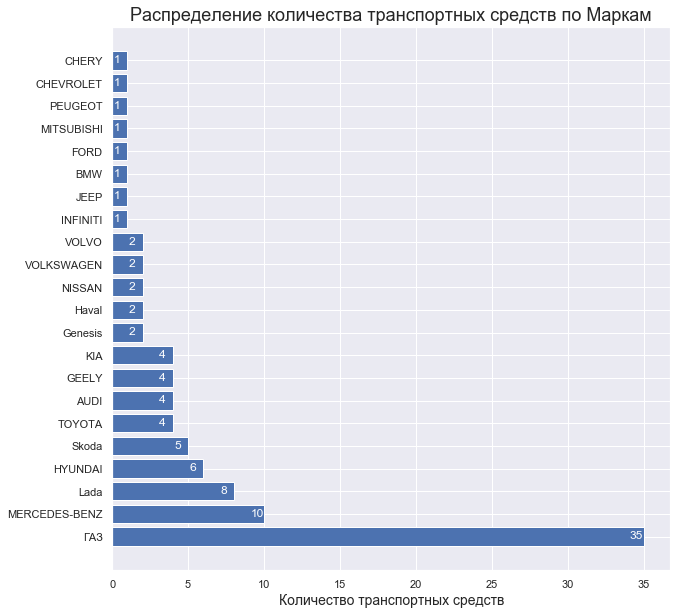

In [18]:
sns.set()

fig = plt.figure(figsize=(10, 10))
plt.barh(df_brends['CARBREND'], df_brends['VIN']);
plt.xlabel('Количество транспортных средств', fontsize = 14)
plt.title('Распределение количества транспортных средств по Маркам', fontsize = 18)

# # annotate value labels to each country
for index, row in df_brends.iterrows():
    value = row['VIN']
    label = format(int(value), ',') # format int with commas
  # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value-0.9, index - 0.10), color='white')
plt.savefig(pre+'data/interm/img/Number of Vehicles.png')
plt.show()

### Шаг 2 . Анализ обогащения данных

In [19]:
df_Describe = pd.DataFrame(df_comp2.isnull().sum(axis= 0), columns=['Количество незаполненных значений'])
df_Describe["Процент заполнения"] = round((len(df_comp2) - df_Describe['Количество незаполненных значений'])/len(df_comp2)*100, 2)
df_Describe.index.name = 'Показатель'
df_Describe = df_Describe.sort_values(by='Процент заполнения')
df_Describe.reset_index(inplace=True)
df_Describe.head()

,Показатель,Количество незаполненных значений,Процент заполнения
0,Регион предыдущей регистрации,98,0.0
1,ИНН владельца предыдущей регистрации,98,0.0
2,Тип владельца предыдущей регистрации,98,0.0
3,Номер владельца предыдущей регистрации,98,0.0
4,Дата предыдущей регистрации,98,0.0


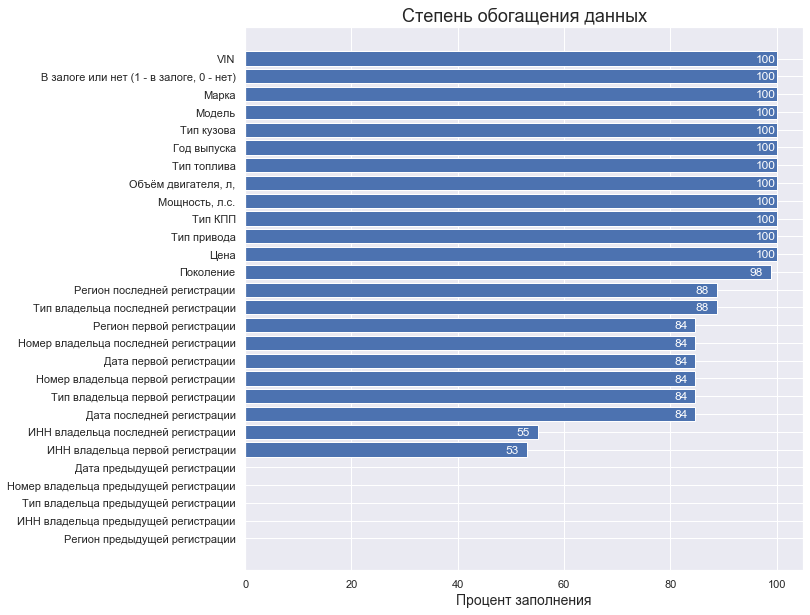

In [20]:
fig = plt.figure(figsize=(10, 10))
plt.barh(df_Describe['Показатель'], df_Describe['Процент заполнения']);
plt.xlabel('Процент заполнения', fontsize = 14)
plt.title('Степень обогащения данных', fontsize = 18)


# # # annotate value labels to each country
for index, row in df_Describe.iterrows():
    value = row['Процент заполнения']
    label = format(int(value), ',') # format int with commas
  # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value-4, index - 0.20), color='white')

plt.show()
fig.savefig(pre+'data/interm/img/Степень обогащения данных.png')

Определение правильности обогащения информации

In [21]:
test_data['CARMODEL'] = test_data['CARMODEL'].str.upper()
df_comp2['Марка'] = df_comp2['Марка'].str.upper()
test_data['CARBREND'] = test_data['CARBREND'].str.upper()

test_data["CARBREND"] = test_data.CARBREND.replace({ 'ГАЗ':'GAZ'})
df_comp2["Марка"] = df_comp2.Марка.replace({ 'ГАЗ':'GAZ'})

In [22]:
kwargs = dict( sourcesName = ['test_data', 'comp2'], 
               suffix = '_comp2',
               on='VIN', 
               notnull_col = ['CARBREND', 'Марка'],
               base_col = [ 'CARBREND', 'CARMODEL', 'Марка', 'Модель']
             )

comp =  ComparisonDataFrames(test_data, df_comp2, **kwargs)  
missed = comp.missedRows(sourcesName='test_data')
missed = comp.missedRows(sourcesName='comp2')
df = comp.presentRows()


отсутствуют в test_data 0 строк
отсутствуют в comp2 0 строк
одновременно присутствуют в test_data и comp2 98 строк


In [23]:
df_diff = comp.check_fields('CARBREND', 'Марка')


значения совпадают во всех 98 строках


In [24]:
df_diff = comp.check_fields('CARMODEL', 'Модель')
df_diff

значения не совпадают у 52 строк из 98


,CARBREND,CARMODEL,Марка,Модель,CARMODEL,Модель
4,LADA,VESTA,LADA,VESTA SW,VESTA,VESTA SW
6,VOLVO,XC 90,VOLVO,XC90,XC 90,XC90
7,LADA,LARGUS,LADA,LARGUS VP,LARGUS,LARGUS VP
9,LADA,VESTA,LADA,VESTA SEDAN,VESTA,VESTA SEDAN
13,TOYOTA,RAV 4,TOYOTA,RAV4,RAV 4,RAV4
15,LADA,GRANTA,LADA,2191 GRANTA 2 LIFTBACK,GRANTA,2191 GRANTA 2 LIFTBACK
16,CHERY,TIGGO8 PRO,CHERY,TIGGO 8 PRO,TIGGO8 PRO,TIGGO 8 PRO
22,LADA,VESTA,LADA,VESTA SW,VESTA,VESTA SW
28,GEELY,ATLAS PRO,GEELY,EMGRAND X7,ATLAS PRO,EMGRAND X7
29,LADA,GRANTA,LADA,2191 GRANTA 2 LIFTBACK,GRANTA,2191 GRANTA 2 LIFTBACK


не смотря на то, чло значения не совпадают у 52 строк из 98, по смыслу это одно и тоже. так что качество обогащение информации по VIN хорошее